In [138]:
# Transformers installation
!pip install transformers
import pylab
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline
from pylab import rcParams

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [140]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

result = classifier("I hate you")[0]
print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


label: NEGATIVE, with score: 0.9991


In [38]:
rcParams['figure.figsize'] = 10, 5
zero_shot_classifier1 = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")
result1 = zero_shot_classifier(
  sequences = "what are the visualisation capabilities of your platform? How can we make it better?", 
  candidate_labels = ["customer data platform", "analytics"],
  multi_label= True
)

In [39]:
zero_shot_classifier2 = pipeline("zero-shot-classification",
                      model="roberta-large-mnli")
result2 = zero_shot_classifier2(
  sequences = "what are the visualisation capabilities of your platform? How can we make it better?", 
  candidate_labels = ["customer data platform", "analytics"],
  multi_label= True
)



Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [95]:
a1x,b1x = result1["scores"]
a1 = a1x/(a1x+b1x)
b1 = b1x/(a1x+b1x)
a1,b1

(0.6136216390216149, 0.38637836097838507)

In [111]:
a2x,b2x = result2["scores"]
a2 = a2x/(a2x+b2x)
b2 = b2x/(a2x+b2x)
a2,b2


(0.6269099399982481, 0.37309006000175193)

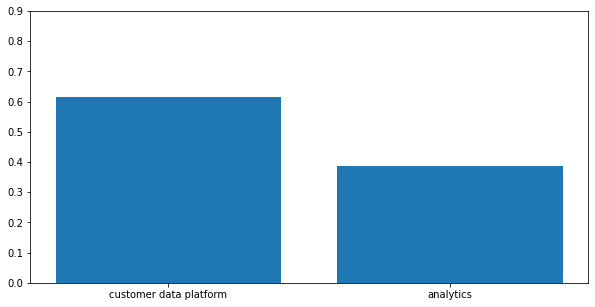

In [112]:
plt.bar(result1["labels"], [a1,b1])
plt.yticks(list(np.arange(0, 1, 0.1)))
plt.show()

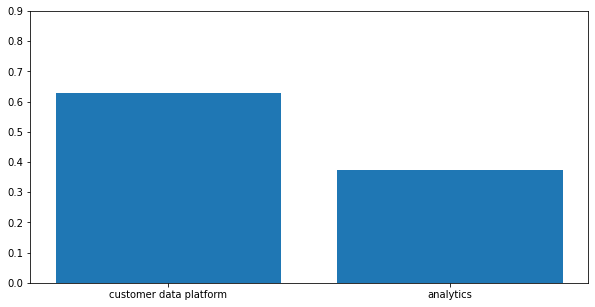

In [113]:
plt.bar(result2["labels"], [a2,b2])
plt.yticks(list(np.arange(0, 1, 0.1)))
plt.show()

In [114]:
and_boosted_a=a1*a2/(a1*a2+b1*b2)
and_boosted_b=b1*b2/(a1*a2+b1*b2)
and_boosted_a,and_boosted_b


(0.7274145657637773, 0.27258543423622267)

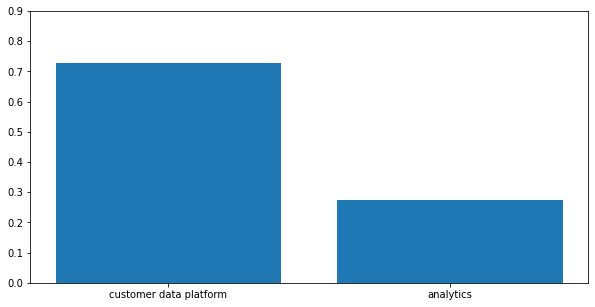

In [115]:
plt.bar(result1["labels"], (and_boosted_a,and_boosted_b))
plt.yticks(list(np.arange(0, 1, 0.1)))
plt.show()

In [116]:
#find ways to draw logic gates on python

In [119]:
or_boosted_a=(a1+a2)/2
or_boosted_b=(b1+b2)/2
or_boosted_a,or_boosted_b

(0.6202657895099315, 0.3797342104900685)

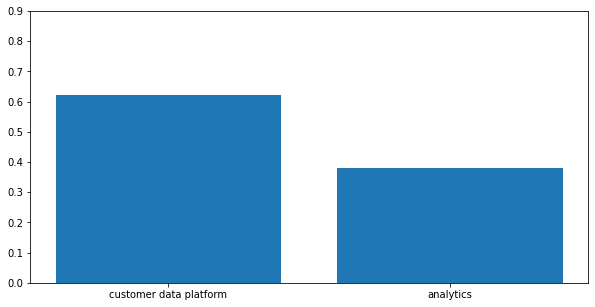

In [120]:
plt.bar(result1["labels"], (or_boosted_a,or_boosted_b))
plt.yticks(list(np.arange(0, 1, 0.1)))
plt.show()

In [132]:
# Expected results: OR Gate
# (1,1) > 1 (1,0) > 1 (0,1) > 1 (0,0) > 0
# The results show that we are not really able to form an OR gate, and hence, the 

or_boosted_ab_c1 = 1 if or_boosted_a>min(a1,a2) else 0

or_boosted_ab_c2 = 1 if (or_boosted_a+or_boosted_b)/2 > min(a1,b2) else 0

or_boosted_ab_c3 = 1 if (or_boosted_a+or_boosted_b)/2 > min(a2,b1)else 0

or_boosted_ab_c4 = 1 if or_boosted_b < min(b1,b2) else 0

or_boosted_ab_c1, or_boosted_ab_c2, or_boosted_ab_c3, or_boosted_ab_c4

(1, 1, 1, 0)

In [107]:
# Expected results: AND Gate
# (1,1) > 1 (1,0) > 0 (0,1) > 0 (0,0) > 0

#Zero shot classifier:
#a1 = Predict class 1 (should be closer to 1)
#b1 = predict class 2

# x1 1.     a1 close to 1 is our 1, b1 close to 0
# x1 0.     a1 close to 0 is our 0, b1 close to 0

and_boosted_ab_c1 = 1 if and_boosted_a*and_boosted_a > a1*a2 else 0

and_boosted_ab_c2 = 1 if and_boosted_a*and_boosted_b > a1*b2 else 0

and_boosted_ab_c3 = 1 if and_boosted_a*and_boosted_b > a2*b1 else 0

and_boosted_ab_c4 = 1 if and_boosted_b*and_boosted_b > b1*b2 else 0

and_boosted_ab_c1,and_boosted_ab_c2, and_boosted_ab_c3, and_boosted_ab_c4

(1, 0, 0, 0)

In [136]:
#NOT Gate
# 1 > 0, 0>1

input = and_boosted_ab_c1

not_boosted_ab_c1 = 1 if input==0 else 1


not_boosted_ab_c1


1

In [137]:
# How does it work with transformers
# Task 1: Implement Universal Gates with Transformers
# Task 2: Define the scenarios in the most logical way (AND, OR, NOT gates)
# Task 3: Build good use cases (something in addition to boosting accuracies)
# Task 3: Build a repository
# Task 4: Multiple Visualisations and Paper writing.....
# Find another use case except boosting classification accuracy of transformers.